<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas-Tutorial/blob/main/tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily
import contextily

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
countries = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

In [ ]:
countries.plot(figsize=(12,12))

In [ ]:
cities.plot(figsize=(12,12), markersize=9)

In [ ]:
#mettere sia le citta che le coutries (una sopra l'altra)
ax = countries.plot(figsize=(12,12))
cities.plot(ax=ax,color = "Red",markersize = 5)

In [ ]:
#item serve per estrarre l'oggetto da geopandas
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()
belgium

In [ ]:
france = countries.loc[countries['name'] == 'France', 'geometry'].item()
france

In [ ]:
#estrae un oggetto(città)
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].item()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()

In [ ]:
paris

In [ ]:
brussels

In [ ]:
#mostra la line che c'è tra prigi e bruxel
from shapely.geometry import LineString
line = LineString([paris, brussels])
line

In [ ]:
#controllare quanto un alinea è lunga
line.length

In [ ]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [ ]:
#colega due città (parigi,bruxel)
geopandas.GeoSeries([belgium,france, paris, brussels, line]).plot(cmap='tab10',figsize=(30,30))

In [ ]:
#controlla se bruxel è contenuta nel belsio
brussels.within(belgium)

In [ ]:
#controlla se il belgio contiene Bruxel
belgium.contains(brussels)

In [ ]:
belgium.contains(paris)

False

In [ ]:
paris.within(belgium)

False

In [ ]:
#perche non la contiene del tutto
belgium.contains(line)

False

In [ ]:
#parzialemnte lo contiene
line.intersects(belgium)

True

In [ ]:
#mostra lo stato che contiene parigi
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


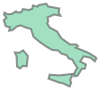

In [ ]:
#tutte le città di italia
italy = countries.loc[countries['name'] == 'Italy', 'geometry'].item()
italy

In [ ]:
cities[cities.within(italy)]

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
226,Rome,POINT (12.48131 41.89790)


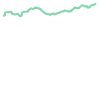

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.item()
amazon

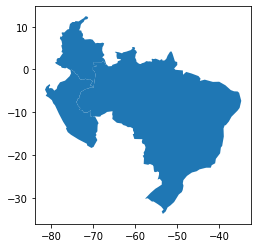

In [ ]:
#vedere tutti gli stati che passano su questo fiume
cittaPassate = countries[countries.crosses(amazon)].plot()

In [ ]:
#far vedere il fiume

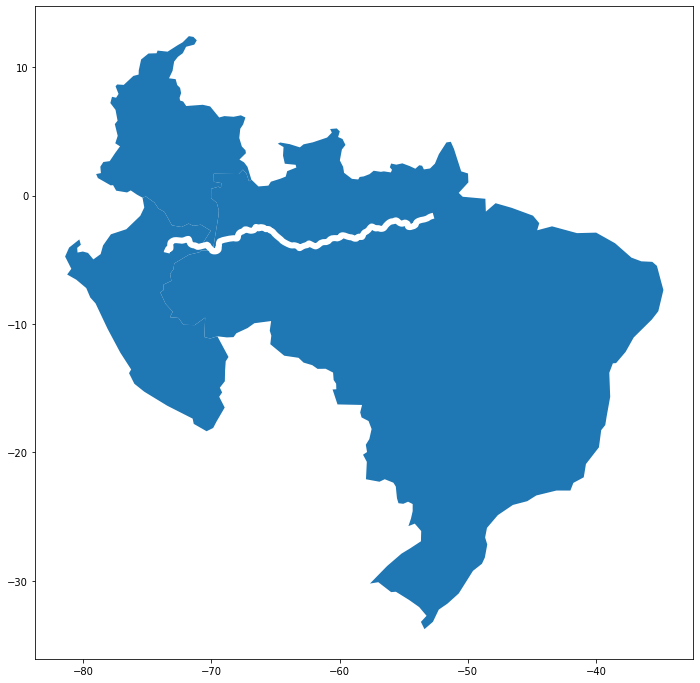

In [ ]:
ax = countries[countries.crosses(amazon)].plot(figsize=(12,12))
amazon2 = rivers[rivers['name'] == 'Amazonas']
amazon2.plot(ax=ax,color = "White",linewidth = 6) # linewidth aumenta la larghezza del fiume